## LEAD SCORING CASE STUDY

PROBLEM STATEMENT:

An education company named X Education sells online courses to industry professionals.They need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.





# Step 1: Importing and Cleaning Data


In [136]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [137]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
from sklearn.linear_model import LinearRegression

In [138]:
# Importing all datasets
Ld = pd.read_csv("Leads.csv")
Ld.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [139]:
Ld.shape

(9240, 37)

In [140]:
Ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [141]:
Ld.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [142]:
Ld.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [143]:
# Checking the percentage of missing values
round(100*(Ld.isnull().sum()/len(Ld.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [144]:
# Checking the percentage of missing values
round(100*(Ld.isnull().sum()/len(Ld.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [145]:
# Converting all the values to lower case
Ld = Ld.applymap(lambda s:s.lower() if type(s) == str else s)

In [146]:
# Replacing 'Select' with NaN (Since it means no option is selected)
Ld = Ld.replace('select',np.nan)

In [147]:
# Checking the percentage of missing values
round(100*(Ld.isnull().sum()/len(Ld.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [148]:
# Removing all the columns that have significantly high missing values
Ld.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index",
                 "Asymmetrique Activity Score","Asymmetrique Profile Score", "Lead Quality", 
                 "Tags", "How did you hear about X Education",
                "What matters most to you in choosing a course","Lead Profile",
                 "Receive More Updates About Our Courses","Update me on Supply Chain Content",
                "Get updates on DM Content","I agree to pay the amount through cheque","Prospect ID","City",
                 "Magazine","Lead Number","Country"],axis=1, inplace=True)

In [149]:
Ld.shape

(9240, 19)

In [150]:
# Rechecking the percentage of missing values
round(100*(Ld.isnull().sum()/len(Ld.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

Lead Source

In [151]:
Ld["Lead Source"].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [152]:
Ld["Lead Source"].fillna(Ld["Lead Source"].mode()[0],inplace=True)

TotalVisits

In [153]:
Ld["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [154]:
Ld["TotalVisits"].fillna(0,inplace=True)

Page Views Per Visit

In [155]:
Ld["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [156]:
Ld["Page Views Per Visit"].fillna(0,inplace=True)


Last Activity 

In [157]:
Ld["Last Activity"].value_counts()

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [158]:
Ld["Last Activity"].fillna(Ld["Last Activity"].mode()[0],inplace=True)

Specialization                            


In [159]:
Ld["Specialization"].value_counts()

finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
travel and tourism                   203
media and advertising                203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: Specialization, dtype: int64

What is your current occupation

In [160]:
Ld["What is your current occupation"].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [161]:
Ld['What is your current occupation'] = Ld['What is your current occupation'].fillna('not provided')


In [162]:
Ld.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            3380
What is your current occupation              0
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [163]:
Ld.shape

(9240, 19)

# Step 2: EDA



UNIVARIATE ANALYISIS

Categorical Variables

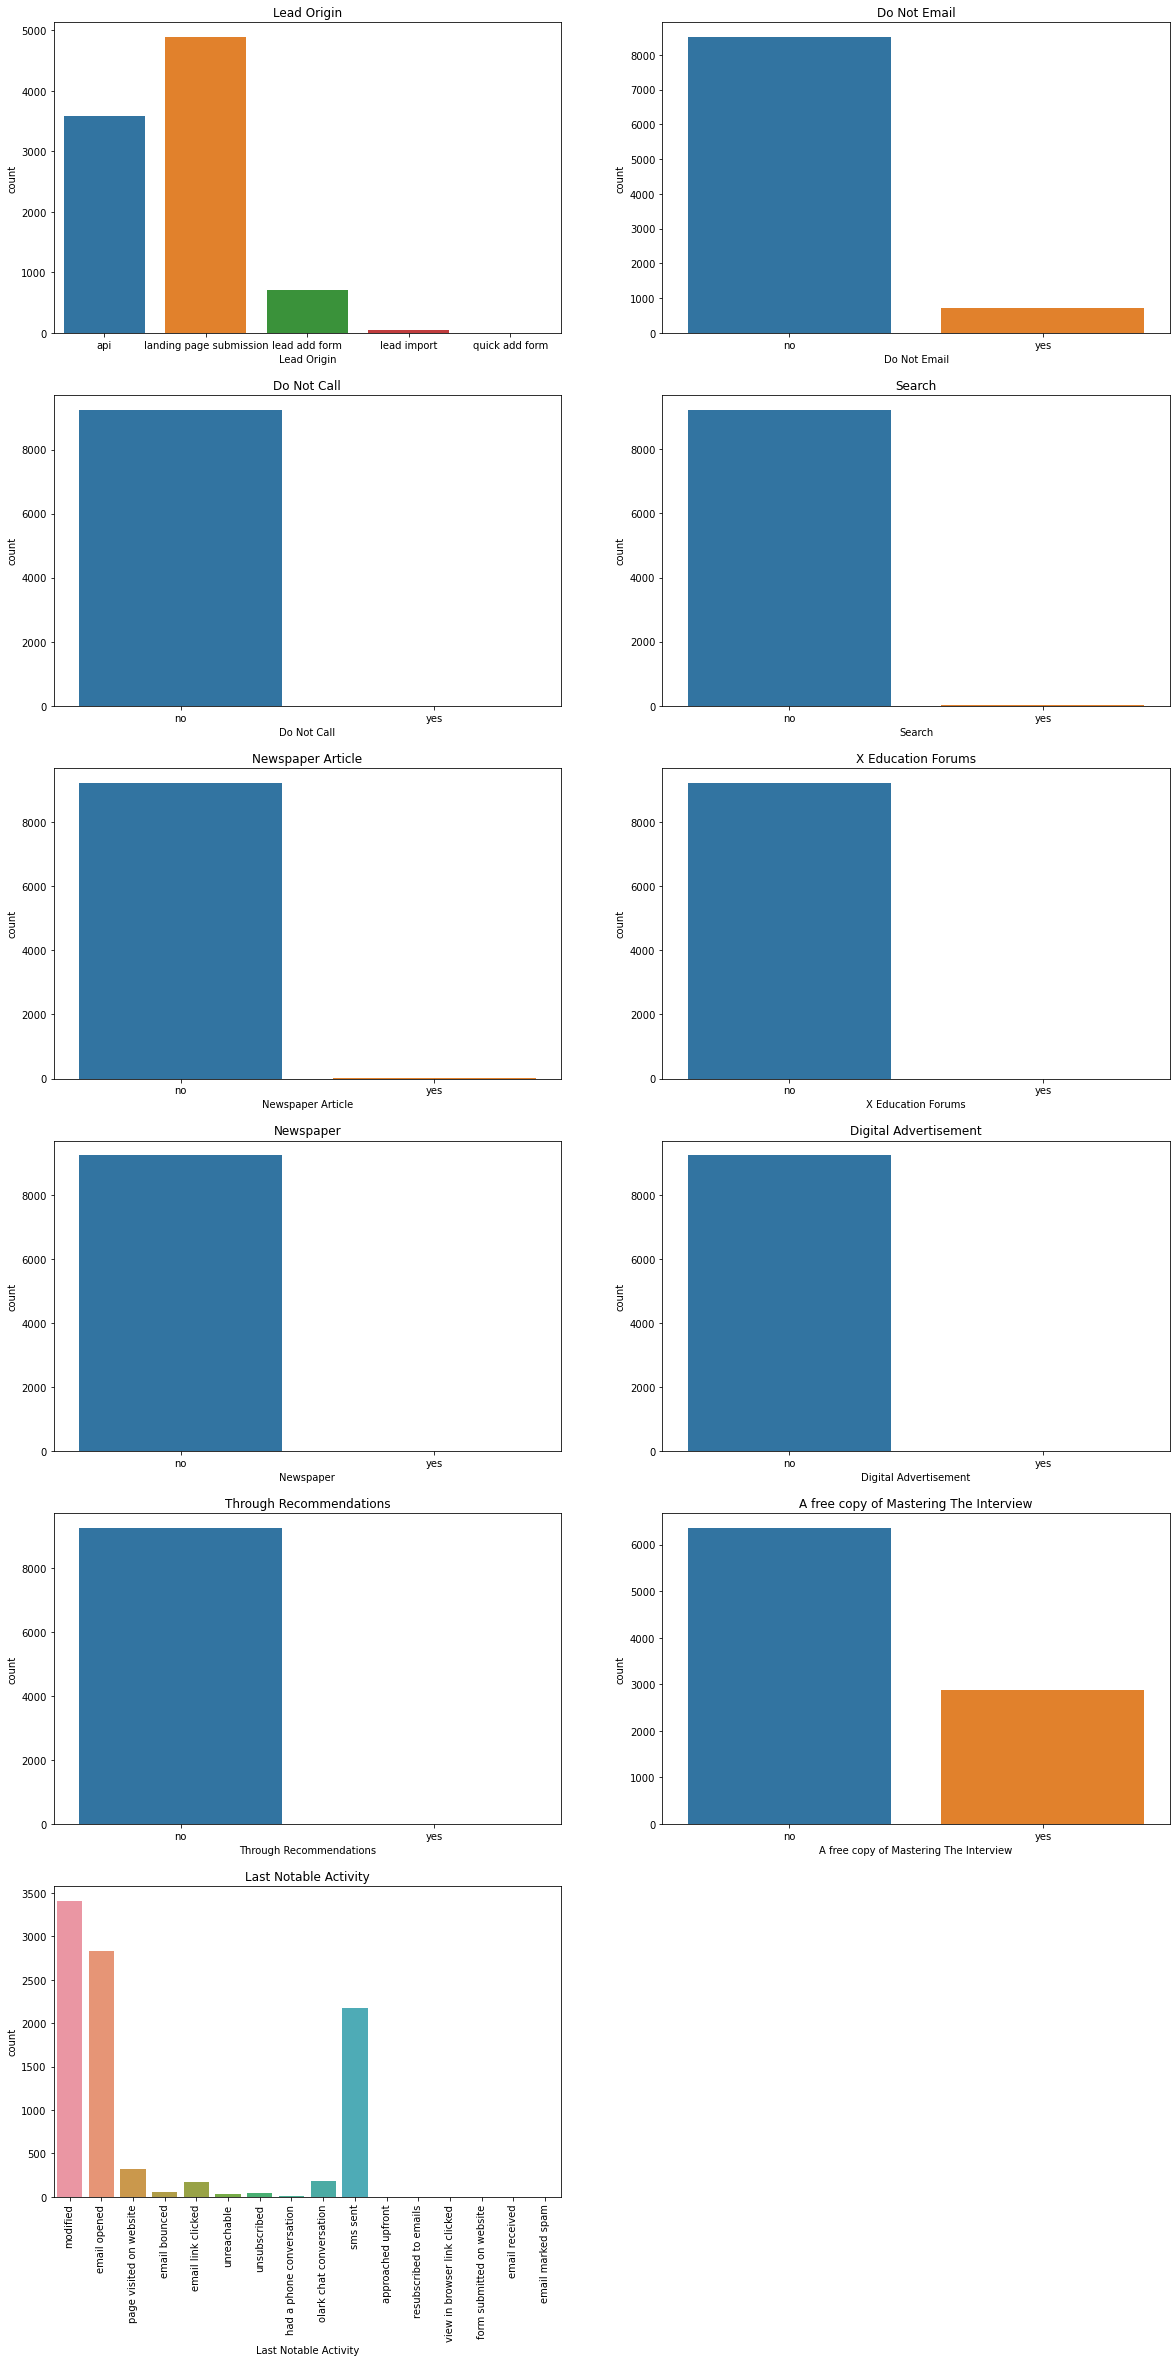

In [164]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Ld['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Ld['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Ld['Do Not Call'])
plt.title('Do Not Call')


plt.subplot(6,2,4)
sns.countplot(Ld['Search'])
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(Ld['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(Ld['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(Ld['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(Ld['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(Ld['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(Ld['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(Ld['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


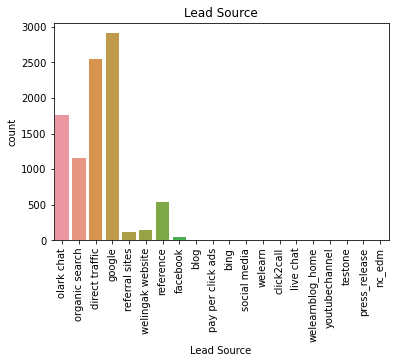

In [165]:
sns.countplot(Ld['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

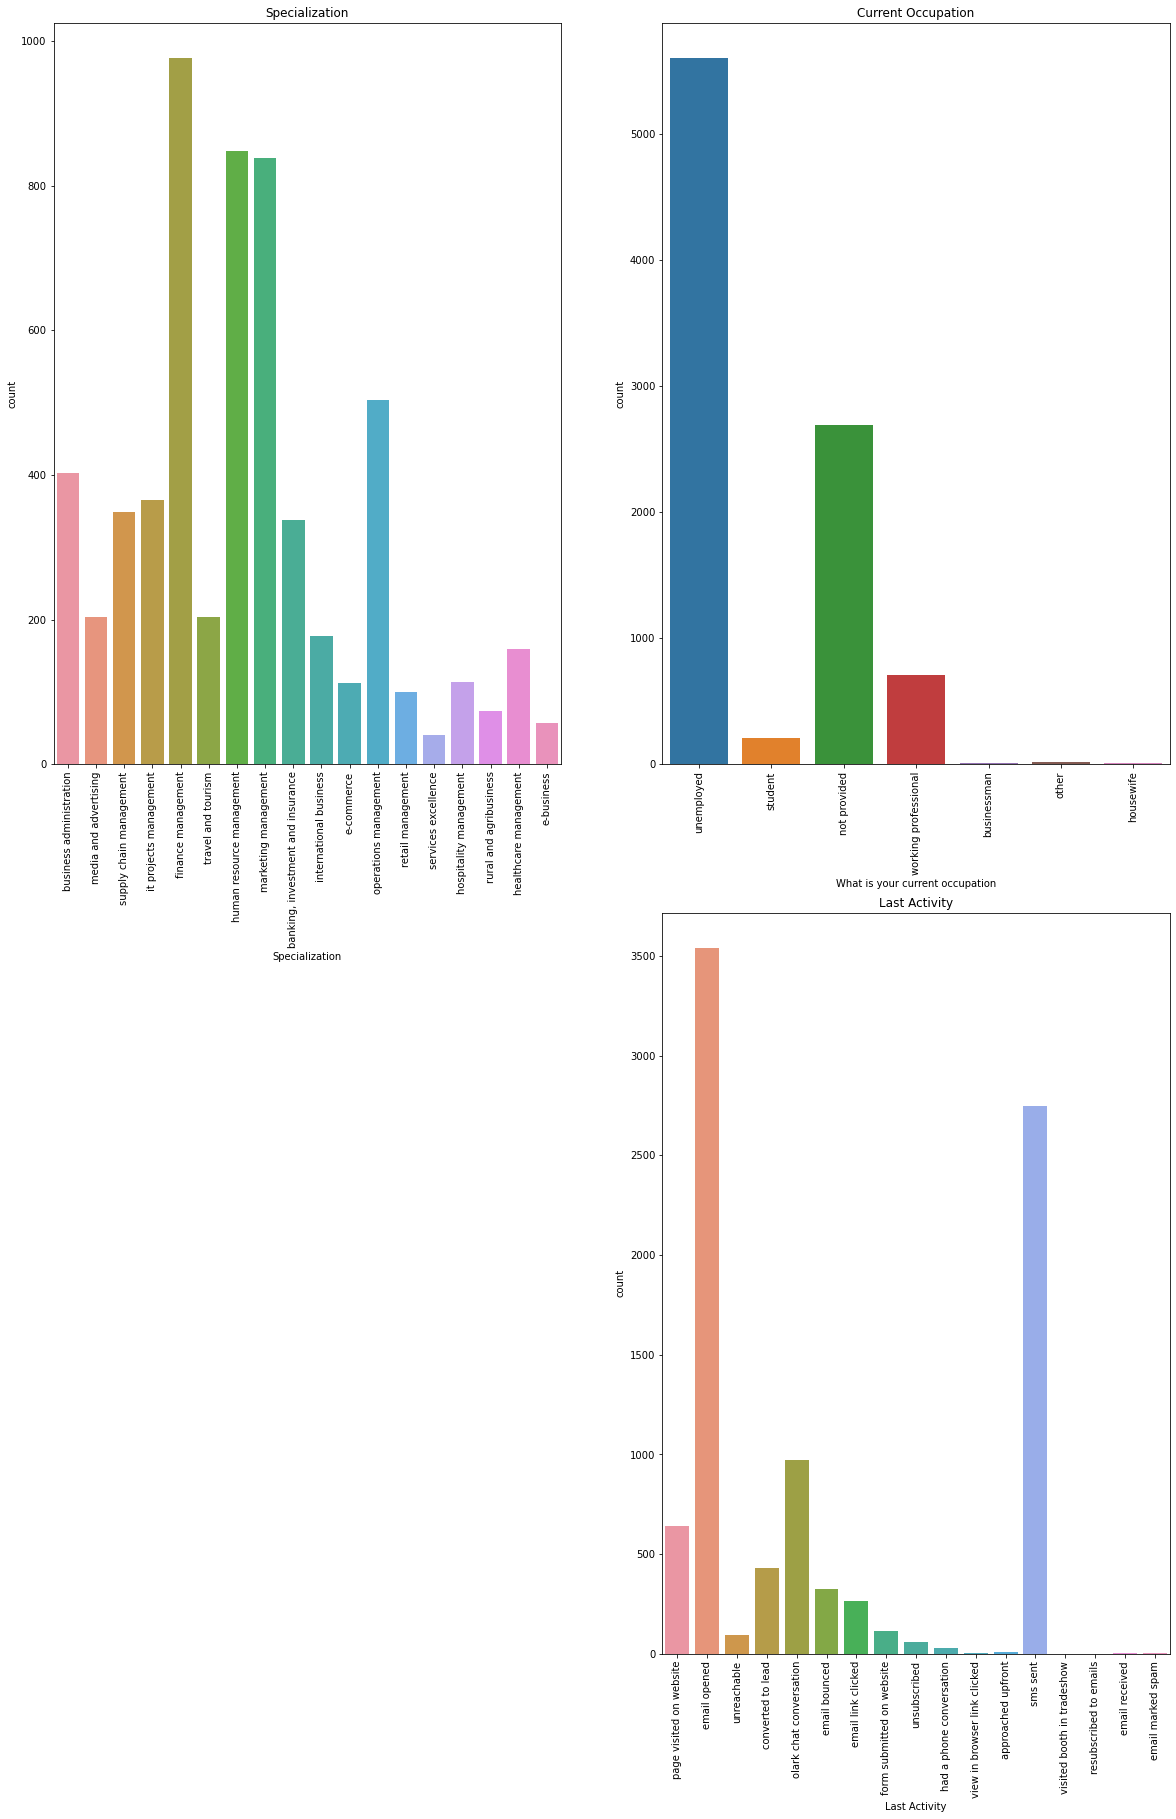

In [166]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(Ld['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Ld['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,4)
sns.countplot(Ld['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

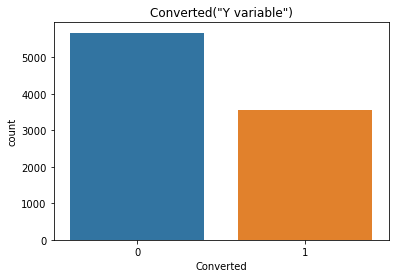

In [167]:
sns.countplot(Ld['Converted'])
plt.title('Converted("Y variable")')
plt.show()

Numerical Variables

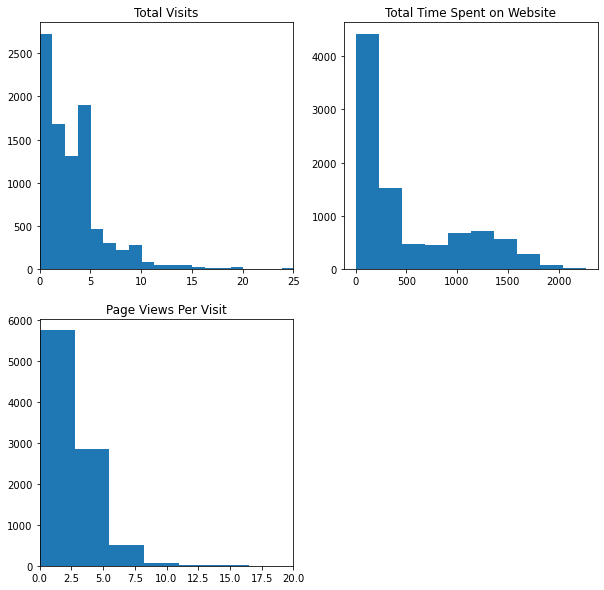

In [168]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Ld['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Ld['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Ld['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

BIVARIATE AND MULTIVARIATE ANALYSIS

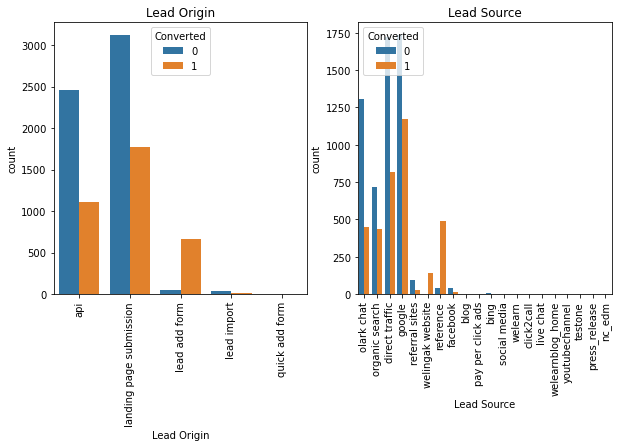

In [169]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

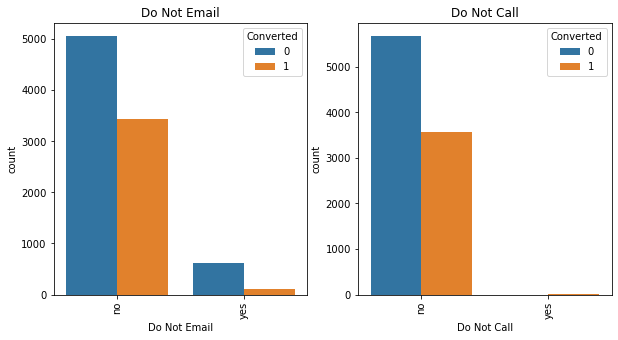

In [170]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

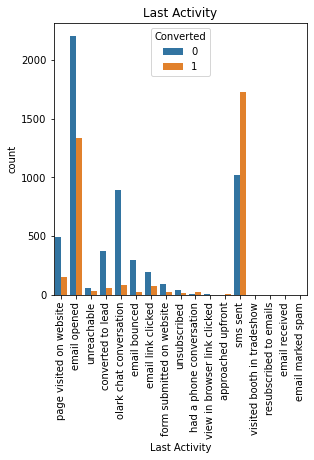

In [171]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')



plt.show()


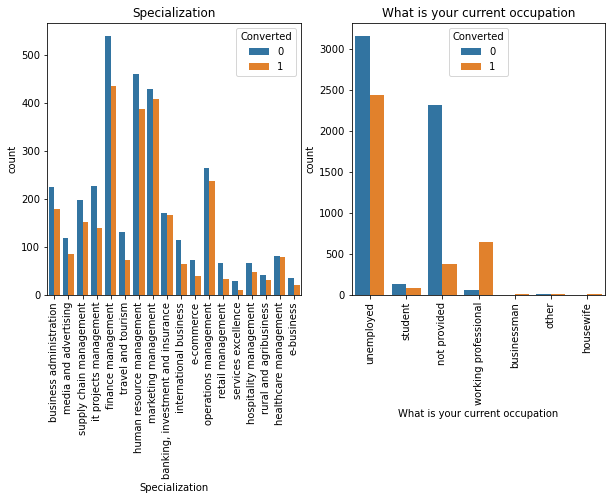

In [172]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')



plt.show()

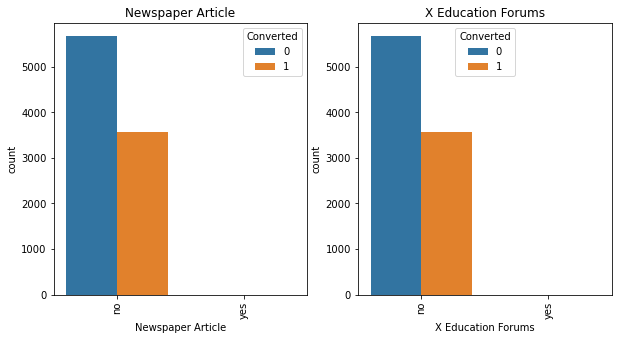

In [173]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

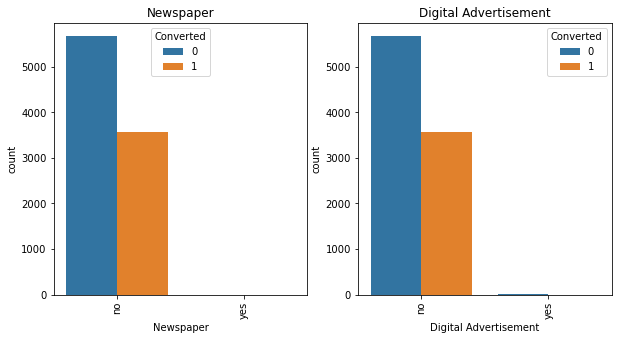

In [174]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

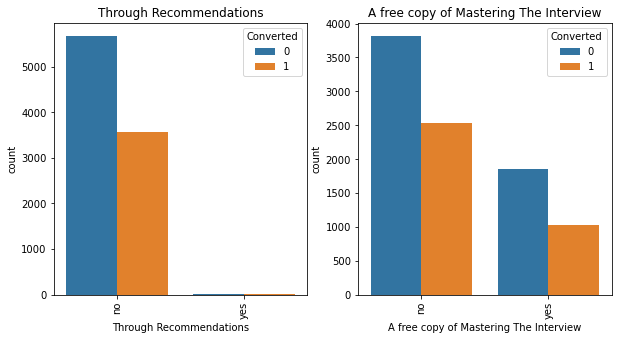

In [175]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

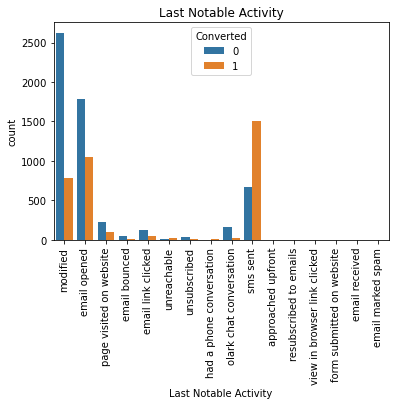

In [176]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Ld).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()


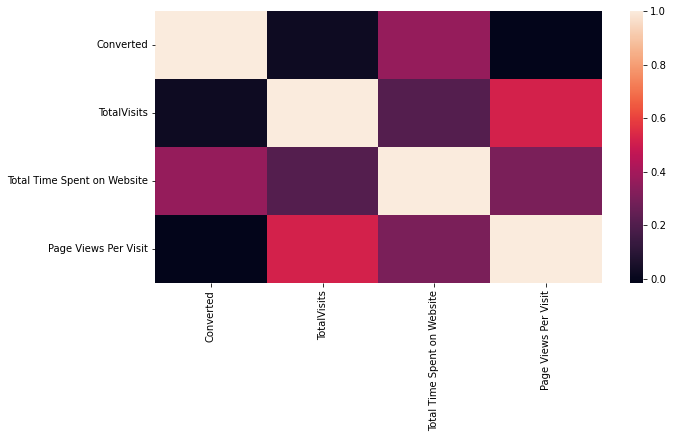

In [177]:
plt.figure(figsize=(10,5))
sns.heatmap(Ld.corr())
plt.show()

In [178]:
numeric = Ld[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


In [179]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'
]

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
Ld[varlist] = Ld[varlist].apply(binary_map)

In [180]:
Ld.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,NaN,unemployed,0,0,0,0,0,0,0,modified
1,api,organic search,0,0,0,5.0,674,2.5,email opened,NaN,unemployed,0,0,0,0,0,0,0,email opened
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,business administration,student,0,0,0,0,0,0,1,email opened
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unreachable,media and advertising,unemployed,0,0,0,0,0,0,0,modified
4,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,NaN,unemployed,0,0,0,0,0,0,0,modified


Dummy Variables

In [181]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Ld[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
        "Last Notable Activity"]], drop_first=True)

 #Adding the results to the master dataframe
Ld = pd.concat([Ld, dummy1], axis=1)

In [182]:
Ld.shape

(9240, 96)

In [183]:
# We have created dummies for the below variables, so we can drop them
Ld = Ld.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
        "Last Notable Activity"], 1)

In [184]:
# Checking for outliers in the continuous variables
nld = Ld[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [185]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
nld.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

# Step 3: Train-Test Split & Logistic Regression Model Building

In [186]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = Ld['Converted']

y.head()

X=Ld.drop('Converted', axis=1)

In [187]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [188]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,-0.291638,-0.017587,-0.645678,-0.885371,-1.062143,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,0,0,0,0,0,0,0,0
6795,-0.291638,-0.017587,0.109111,0.005716,-0.452487,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,0,0,0,0,0,0,0,0
3516,-0.291638,-0.017587,0.297808,-0.691418,0.083827,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,0,0,0,0,0,0,0,0
8105,-0.291638,-0.017587,0.297808,1.365219,1.229797,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,0,0,0,0,1,0,0,0
3934,-0.291638,-0.017587,-0.645678,-0.885371,-1.062143,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,1,0,0,0,0,0,0,0


# Step 4:  Model Building using Stats Model & RFE

In [189]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [190]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False])

In [191]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 40),
 ('Do Not Call', False, 60),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 55),
 ('Search', False, 72),
 ('Newspaper Article', False, 59),
 ('X Education Forums', False, 66),
 ('Newspaper', False, 61),
 ('Digital Advertisement', False, 52),
 ('Through Recommendations', False, 71),
 ('A free copy of Mastering The Interview', False, 67),
 ('Lead Origin_landing page submission', False, 21),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 42),
 ('Lead Origin_quick add form', False, 44),
 ('Lead Source_blog', False, 48),
 ('Lead Source_click2call', False, 18),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 3),
 ('Lead Source_google', False, 2),
 ('Lead Source_live chat', False, 50),
 ('Lead Source_nc_edm', False, 11),
 ('Lead Source_olark chat', False, 9),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_pay per click ads', False, 47),
 ('

In [192]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_direct traffic', 'Lead Source_organic search',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Last Activity_email bounced', 'Last Activity_had a phone conversation',
       'Last Activity_sms sent', 'What is your current occupation_housewife',
       'What is your current occupation_not provided',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified', 'Last Notable Activity_unreachable'],
      dtype='object')

In [193]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_landing page submission', 'Lead Origin_lead import',
       'Lead Origin_quick add form', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_facebook', 'Lead Source_google',
       'Lead Source_live chat', 'Lead Source_nc_edm', 'Lead Source_olark chat',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_social media',
       'Lead Source_testone', 'Lead Source_welearn',
       'Lead Source_welearnblog_home', 'Lead Source_youtubechannel',
       'Last Activity_converted to lead', 'Last Activity_email link clicked',
       'Last Activity_email marked spam', 'Last Activity_email opened',
       'Last Activity_email received',
       'Last 

In [194]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.1
Date:                Tue, 18 Oct 2022   Deviance:                       5340.3
Time:                        20:50:32   Pearson chi2:                 6.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3957
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5066      0.063     -8.102      0.000      -0.629      -0.384
Total Time Spent on Website                              0.9630      0.036     27.091      0.000       0.893       1.033
Lead Origin_lead add form                                2.9067      0.188     15.498      0.000       2.539       3.274
Lead Source_direct traffic                              -0.7191      0.082     -8.767      0.000      -0.880      -0.558
Lead Source_organic search                              -0.4998      0.106     -4.709      0.000      -0.708      -0.292
Lead Source_referral sites                              -0.4417      0.308     -1.435      0.151      -1.045       0.162
Lead Source_welingak website                             1.8463      0.742      2.489      0.013       0.392       3.300
Last Activity_email bounced                             -1.3673      0.295     -4.634      0.000      -1.946      -0.789
Last Activity_had a phone conversation                   1.1459      0.894      1.282      0.200      -0.606       2.898
Last Activity_sms sent                                   1.1777      0.073     16.094      0.000       1.034       1.321
What is your current occupation_housewife               22.7598    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_not provided            -1.0493      0.086    -12.239      0.000      -1.217      -0.881
What is your current occupation_working professional     2.5448      0.187     13.630      0.000       2.179       2.911
Last Notable Activity_had a phone conversation           1.9595      1.424      1.376      0.169      -0.832       4.751
Last Notable Activity_modified                          -0.8995      0.079    -11.432      0.000      -1.054      -0.745
Last Notable Activity_unreachable                        1.6895      0.532      3.173      0.002       0.646       2.733
========================================================================================================================
"""

In [195]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.1
Date:                Tue, 18 Oct 2022   Deviance:                       5340.3
Time:                        20:50:32   Pearson chi2:                 6.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3957
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5066      0.063     -8.102      0.000      -0.629      -0.384
Total Time Spent on Website                              0.9630      0.036     27.091      0.000       0.893       1.033
Lead Origin_lead add form                                2.9067      0.188     15.498      0.000       2.539       3.274
Lead Source_direct traffic                              -0.7191      0.082     -8.767      0.000      -0.880      -0.558
Lead Source_organic search                              -0.4998      0.106     -4.709      0.000      -0.708      -0.292
Lead Source_referral sites                              -0.4417      0.308     -1.435      0.151      -1.045       0.162
Lead Source_welingak website                             1.8463      0.742      2.489      0.013       0.392       3.300
Last Activity_email bounced                             -1.3673      0.295     -4.634      0.000      -1.946      -0.789
Last Activity_had a phone conversation                   1.1459      0.894      1.282      0.200      -0.606       2.898
Last Activity_sms sent                                   1.1777      0.073     16.094      0.000       1.034       1.321
What is your current occupation_housewife               22.7598    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_not provided            -1.0493      0.086    -12.239      0.000      -1.217      -0.881
What is your current occupation_working professional     2.5448      0.187     13.630      0.000       2.179       2.911
Last Notable Activity_had a phone conversation           1.9595      1.424      1.376      0.169      -0.832       4.751
Last Notable Activity_modified                          -0.8995      0.079    -11.432      0.000      -1.054      -0.745
Last Notable Activity_unreachable                        1.6895      0.532      3.173      0.002       0.646       2.733
========================================================================================================================
"""

In [196]:
#dropping column with high p-value

col = col.drop('Last Activity_had a phone conversation',1)


In [197]:

col = col.drop('Last Notable Activity_had a phone conversation',1)


In [198]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.1
Date:                Tue, 18 Oct 2022   Deviance:                       5354.3
Time:                        20:50:32   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3944
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4943      0.062     -7.933      0.000      -0.616      -0.372
Total Time Spent on Website                              0.9624      0.035     27.120      0.000       0.893       1.032
Lead Origin_lead add form                                2.9063      0.188     15.499      0.000       2.539       3.274
Lead Source_direct traffic                              -0.7217      0.082     -8.810      0.000      -0.882      -0.561
Lead Source_organic search                              -0.4964      0.106     -4.686      0.000      -0.704      -0.289
Lead Source_referral sites                              -0.4273      0.305     -1.400      0.162      -1.026       0.171
Lead Source_welingak website                             1.8393      0.742      2.479      0.013       0.385       3.293
Last Activity_email bounced                             -1.3774      0.295     -4.669      0.000      -1.956      -0.799
Last Activity_sms sent                                   1.1666      0.073     15.964      0.000       1.023       1.310
What is your current occupation_housewife               22.7471    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_not provided            -1.0522      0.086    -12.290      0.000      -1.220      -0.884
What is your current occupation_working professional     2.5491      0.186     13.669      0.000       2.184       2.915
Last Notable Activity_modified                          -0.9016      0.078    -11.498      0.000      -1.055      -0.748
Last Notable Activity_unreachable                        1.6771      0.533      3.149      0.002       0.633       2.721
========================================================================================================================
"""

Since 'All' the p: values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [199]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_lead add form,1.45
11,Last Notable Activity_modified,1.44
9,What is your current occupation_not provided,1.34
7,Last Activity_sms sent,1.31
2,Lead Source_direct traffic,1.26
5,Lead Source_welingak website,1.24
10,What is your current occupation_working profes...,1.16
3,Lead Source_organic search,1.12
0,Total Time Spent on Website,1.10
6,Last Activity_email bounced,1.10


In [201]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.1
Date:                Tue, 18 Oct 2022   Deviance:                       5354.3
Time:                        20:50:32   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3944
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4943      0.062     -7.933      0.000      -0.616      -0.372
Total Time Spent on Website                              0.9624      0.035     27.120      0.000       0.893       1.032
Lead Origin_lead add form                                2.9063      0.188     15.499      0.000       2.539       3.274
Lead Source_direct traffic                              -0.7217      0.082     -8.810      0.000      -0.882      -0.561
Lead Source_organic search                              -0.4964      0.106     -4.686      0.000      -0.704      -0.289
Lead Source_referral sites                              -0.4273      0.305     -1.400      0.162      -1.026       0.171
Lead Source_welingak website                             1.8393      0.742      2.479      0.013       0.385       3.293
Last Activity_email bounced                             -1.3774      0.295     -4.669      0.000      -1.956      -0.799
Last Activity_sms sent                                   1.1666      0.073     15.964      0.000       1.023       1.310
What is your current occupation_housewife               22.7471    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_not provided            -1.0522      0.086    -12.290      0.000      -1.220      -0.884
What is your current occupation_working professional     2.5491      0.186     13.669      0.000       2.184       2.915
Last Notable Activity_modified                          -0.9016      0.078    -11.498      0.000      -1.055      -0.748
Last Notable Activity_unreachable                        1.6771      0.533      3.149      0.002       0.633       2.721
========================================================================================================================
"""

In [202]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_lead add form,1.45
11,Last Notable Activity_modified,1.44
9,What is your current occupation_not provided,1.34
7,Last Activity_sms sent,1.31
2,Lead Source_direct traffic,1.26
5,Lead Source_welingak website,1.24
10,What is your current occupation_working profes...,1.16
3,Lead Source_organic search,1.12
0,Total Time Spent on Website,1.10
6,Last Activity_email bounced,1.10


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data

In [203]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.206475
6795    0.229623
3516    0.238730
8105    0.879345
3934    0.095527
4844    0.986515
3297    0.155375
8071    0.978287
987     0.091759
7423    0.929079
dtype: float64

In [204]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20647455, 0.22962261, 0.23873035, 0.87934544, 0.09552689,
       0.98651459, 0.15537511, 0.9782866 , 0.09175886, 0.92907894])

In [205]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.206475,1871
1,0,0.229623,6795
2,0,0.238730,3516
3,0,0.879345,8105
4,0,0.095527,3934


In [206]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.206475,1871,0
1,0,0.229623,6795,0
2,0,0.238730,3516,0
3,0,0.879345,8105,1
4,0,0.095527,3934,0


In [207]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3555  447]
 [ 807 1659]]


In [208]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8061224489795918


In [209]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [210]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6727493917274939

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.8883058470764618

In [212]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11169415292353824


In [213]:
# positive predictive value 
print (TP / float(TP+FP))

0.7877492877492878


In [214]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8149931224209078


#  PLOTTING ROC CURVE


In [215]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [216]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

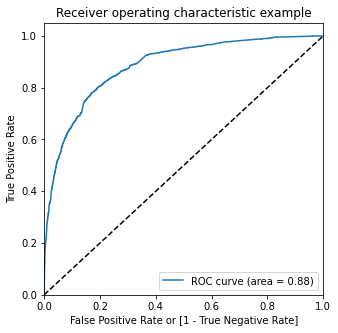

In [217]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Finding Optimal Cutoff Point

In [218]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.206475,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.229623,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.238730,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.879345,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.095527,3934,0,1,0,0,0,0,0,0,0,0,0


In [219]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.620439  0.966342  0.407296
0.2   0.2  0.742115  0.926602  0.628436
0.3   0.3  0.792672  0.834955  0.766617
0.4   0.4  0.809988  0.772506  0.833083
0.5   0.5  0.806122  0.672749  0.888306
0.6   0.6  0.803185  0.607867  0.923538
0.7   0.7  0.787570  0.522303  0.951024
0.8   0.8  0.761905  0.423358  0.970515
0.9   0.9  0.720161  0.283861  0.989005


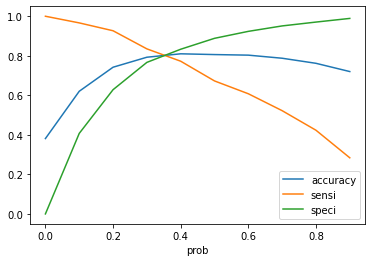

In [220]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [221]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.206475,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.229623,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.238730,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.879345,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.095527,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [222]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.206475,1871,0,21
1,0,0.229623,6795,0,23
2,0,0.238730,3516,0,24
3,0,0.879345,8105,1,88
4,0,0.095527,3934,0,10


In [223]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7926716141001855

In [224]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3068,  934],
       [ 407, 2059]], dtype=int64)

In [225]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [226]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8349553933495539

In [227]:
# Let us calculate specificity
TN / float(TN+FP)

0.7666166916541729

INSIGHTS: 
The ROC curve has a value of 0.88.Accuracy : 79% Sensitivity : 83% Specificity : 77% 

In [228]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.23338330834582707


In [229]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6879385232208487


In [230]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8828776978417266


In [231]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3068,  934],
       [ 407, 2059]], dtype=int64)

In [232]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6879385232208487

In [233]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8349553933495539

In [234]:
from sklearn.metrics import precision_score, recall_score

In [235]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6879385232208487

In [236]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8349553933495539

In [237]:
from sklearn.metrics import precision_recall_curve

In [238]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

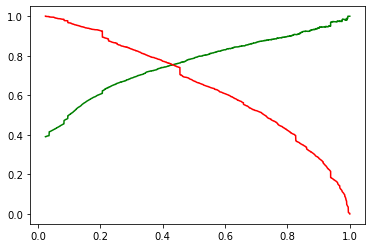

In [239]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [240]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
4269,-0.298654,0.0,1.324501,0.933036,2.660405,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,1,0,0,0
2376,-0.298654,0.0,-0.944318,-0.900812,-1.108316,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,1,0,0,0
7766,-0.298654,0.0,0.473694,-0.793792,1.247135,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,1,0,0
9199,-0.298654,0.0,-0.944318,-0.900812,-1.108316,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,1,0,0,0,0,0,0,0
4359,-0.298654,0.0,-0.944318,-0.900812,-1.108316,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,0,0,0


In [241]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Last Activity_email bounced,Last Activity_sms sent,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_unreachable
4269,0.933036,0,1,0,0,0,0,1,0,1,0,0,0
2376,-0.900812,1,0,0,0,0,0,1,0,0,0,0,0
7766,-0.793792,0,0,0,0,0,0,0,0,0,1,0,1
9199,-0.900812,0,0,0,0,0,0,0,0,0,0,1,0
4359,-0.900812,1,0,0,0,0,0,0,0,0,0,0,0


In [242]:
X_test_sm = sm.add_constant(X_test)

# PREDICTIONS ON TEST SET

In [243]:
y_test_pred = res.predict(X_test_sm)

In [244]:
y_test_pred[:10]

4269    0.449279
2376    0.937718
7766    0.951107
9199    0.094251
4359    0.824209
9186    0.705538
1631    0.600409
8963    0.290422
8007    0.062122
5324    0.521183
dtype: float64

In [245]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [246]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [247]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [248]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [249]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [250]:
y_pred_final.head()


,Converted,Prospect ID,0
0,1,4269,0.449279
1,1,2376,0.937718
2,1,7766,0.951107
3,0,9199,0.094251
4,1,4359,0.824209


In [251]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [252]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [253]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.449279,45
1,2376,1,0.937718,94
2,7766,1,0.951107,95
3,9199,0,0.094251,9
4,4359,1,0.824209,82


In [254]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [255]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.449279,45,1
1,2376,1,0.937718,94,1
2,7766,1,0.951107,95,1
3,9199,0,0.094251,9,0
4,4359,1,0.824209,82,1


In [256]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7954545454545454

In [257]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1292,  385],
       [ 182,  913]], dtype=int64)

In [258]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [259]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8337899543378996

In [260]:
# Let us calculate specificity
TN / float(TN+FP)

0.7704233750745378

In [261]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7033898305084746

In [262]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8337899543378996

Insights:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 79%
Sensitivity : 83%
Specificity : 77%

In [ ]:
#Final Observation: 
#Let us compare the values obtained for Train & Test:
Train Data: Accuracy : 79% Sensitivity : 83% Specificity : 77%
Test Data: Accuracy : 79% Sensitivity : 83% Specificity : 77%